## Example in section B.4.1 (Minimum sub-optimality gap)

theta: 0.0 - Optimal policies: [[1 1]] - Q values: [[0.14999971 0.29999971]
 [0.14999971 1.29999971]] - Suboptimal actions: [[ True False]
 [ True False]]
-----------------------
theta: 0.8846153846153846 - Optimal policies: [[1 0]
 [1 1]] - Q values: [[0.76923044 1.53846121]
 [0.76923044 0.76923044]] - Suboptimal actions: [[ True False]
 [False False]]
-----------------------
theta: 0.8848848848848849 - Optimal policies: [[1 0]] - Q values: [[0.76946479 1.53892991]
 [0.76946479 0.76916014]] - Suboptimal actions: [[ True False]
 [False  True]]
-----------------------


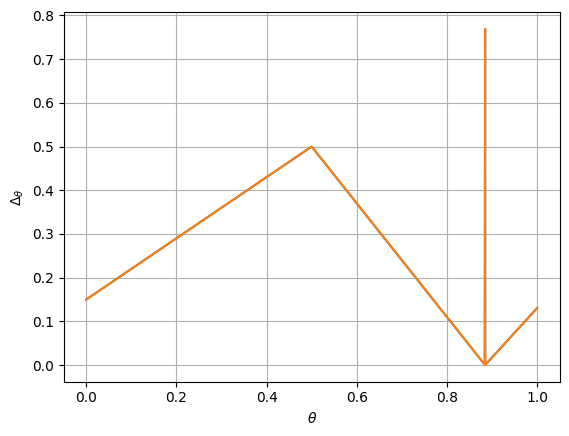

In [20]:

from tabular.envs.riverswim import RiverSwim
from tabular.envs.doublechain import DoubleChain
from tabular.envs.mdp import MDP
from tabular.utils.bound import solve_bound, solve_bound_new
import numpy as np
import matplotlib.pyplot as plt
ns = 2
na = 2
Npoints = 1000
gamma = 0.5
env = RiverSwim(ns)
ns,na = env.dim_state, env.dim_action
mdp = MDP(P=env.P)


theta = np.linspace(0,1, Npoints)
theta = np.array(theta.tolist() + [23/26])
theta.sort()
Npoints += 1

basis = np.eye(ns * na)
e1, e2 = basis[-3,:], basis[-1,:]

r1 = e1.reshape(ns, na)[..., np.newaxis]
r2 = e2.reshape(ns, na)[..., np.newaxis]


data = np.zeros((Npoints, ns))
data_min = np.zeros((Npoints, ns))
i = 0
prev_pi = np.array([[0,0],[0,0]])


for x in theta:
    reward = x * r1 + (1-x) * r2
    stats = mdp.get_mdp_statistics(reward, gamma)
    gaps = stats.Delta
    if np.any(stats.pi != prev_pi):
        print(f'theta: {x} - Optimal policies: {stats.pi} - Q values: {stats.Q} - Suboptimal actions: {stats.idxs_subopt_actions}')
        print(f'-----------------------')
        prev_pi = stats.pi
    gaps = gaps[stats.idxs_subopt_actions]
    data[i,:] = gaps.flatten().copy()
    data_min[i] = gaps.min()
    i+=1

plt.plot(theta,data_min)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\Delta_\theta$')
plt.grid()


## About the discontinuity in $\theta=23/26$

In [13]:
x = 23/26
reward = x * r1 + (1-x) * r2
stats = mdp.get_mdp_statistics(reward, gamma)
gaps = stats.Delta
gaps = gaps[gaps > 0]
print(f'theta: 23/26 - Gap value: {gaps.min()} - Optimal policies: {stats.pi} ')

theta: 23/26 - Gap value: 0.769230769230769 - Optimal policies: [[1 0]
 [1 1]] 
